In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('/Users/anchanghun/Downloads/kddcup.data', header=None)

feature_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

# Rename the columns of the DataFrame
df.columns = feature_names

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [3]:
df['label'].value_counts()

label
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df['service'] = label_encoder.fit_transform(df['service'])
df['flag'] = label_encoder.fit_transform(df['flag'])
df['label'] = label_encoder.fit_transform(df['label'])

# 인코딩된 데이터프레임 확인
print(df.head())

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       24     9        215      45076     0   
1         0              1       24     9        162       4528     0   
2         0              1       24     9        236       1228     0   
3         0              1       24     9        233       2032     0   
4         0              1       24     9        239        486     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   0   
1               0       0    0  ...                   1   
2               0       0    0  ...                   2   
3               0       0    0  ...                   3   
4               0       0    0  ...                   4   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0

In [5]:
df['label'].value_counts()

label
18    2807886
9     1072017
11     972781
17      15892
5       12481
15      10413
10       2316
0        2203
21       1020
20        979
14        264
3          53
1          30
6          21
22         20
4          12
16         10
7           9
2           8
8           7
13          4
12          3
19          2
Name: count, dtype: int64

# 'label' 열의 값이 'normal.'이면 0으로, 'normal.'이 아니면 1로 변경
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal.' else 1)

# 변경된 데이터프레임 확인
print(df.head())

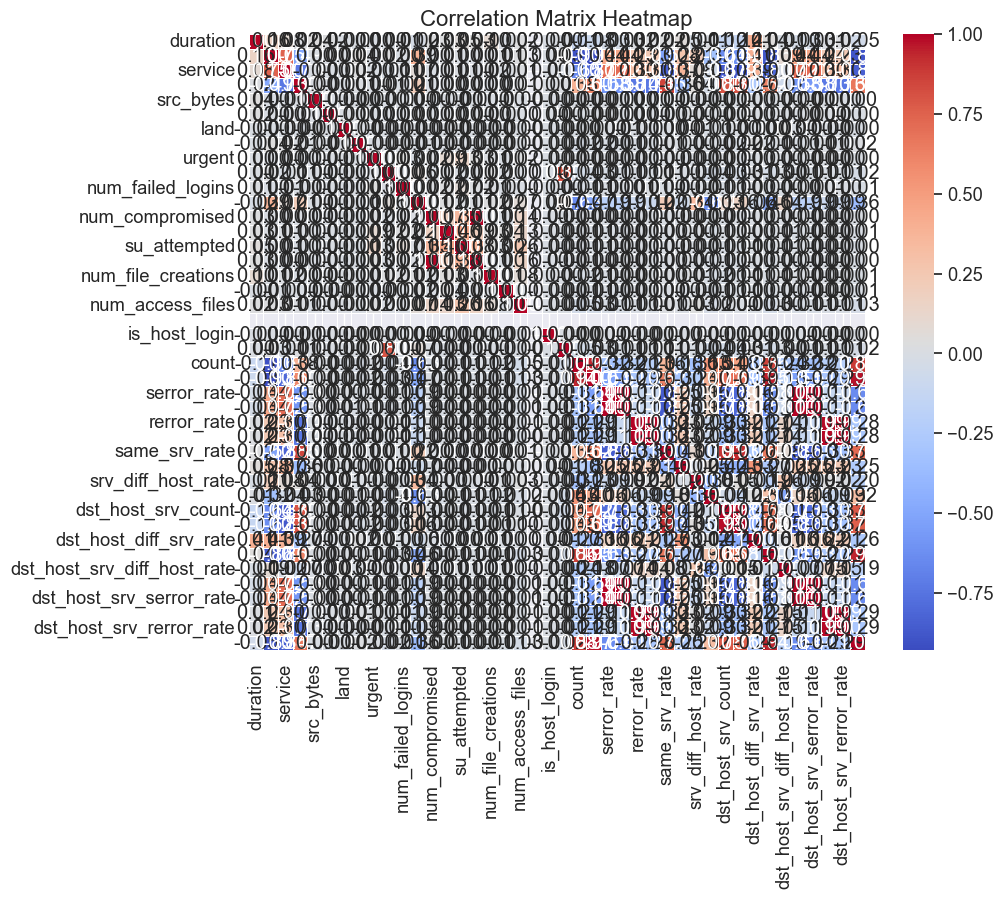

In [6]:
# 상관 행렬 계산
df_corr = df.corr()

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 폰트 크기 조정
heatmap = sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

# 히트맵 제목 설정
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

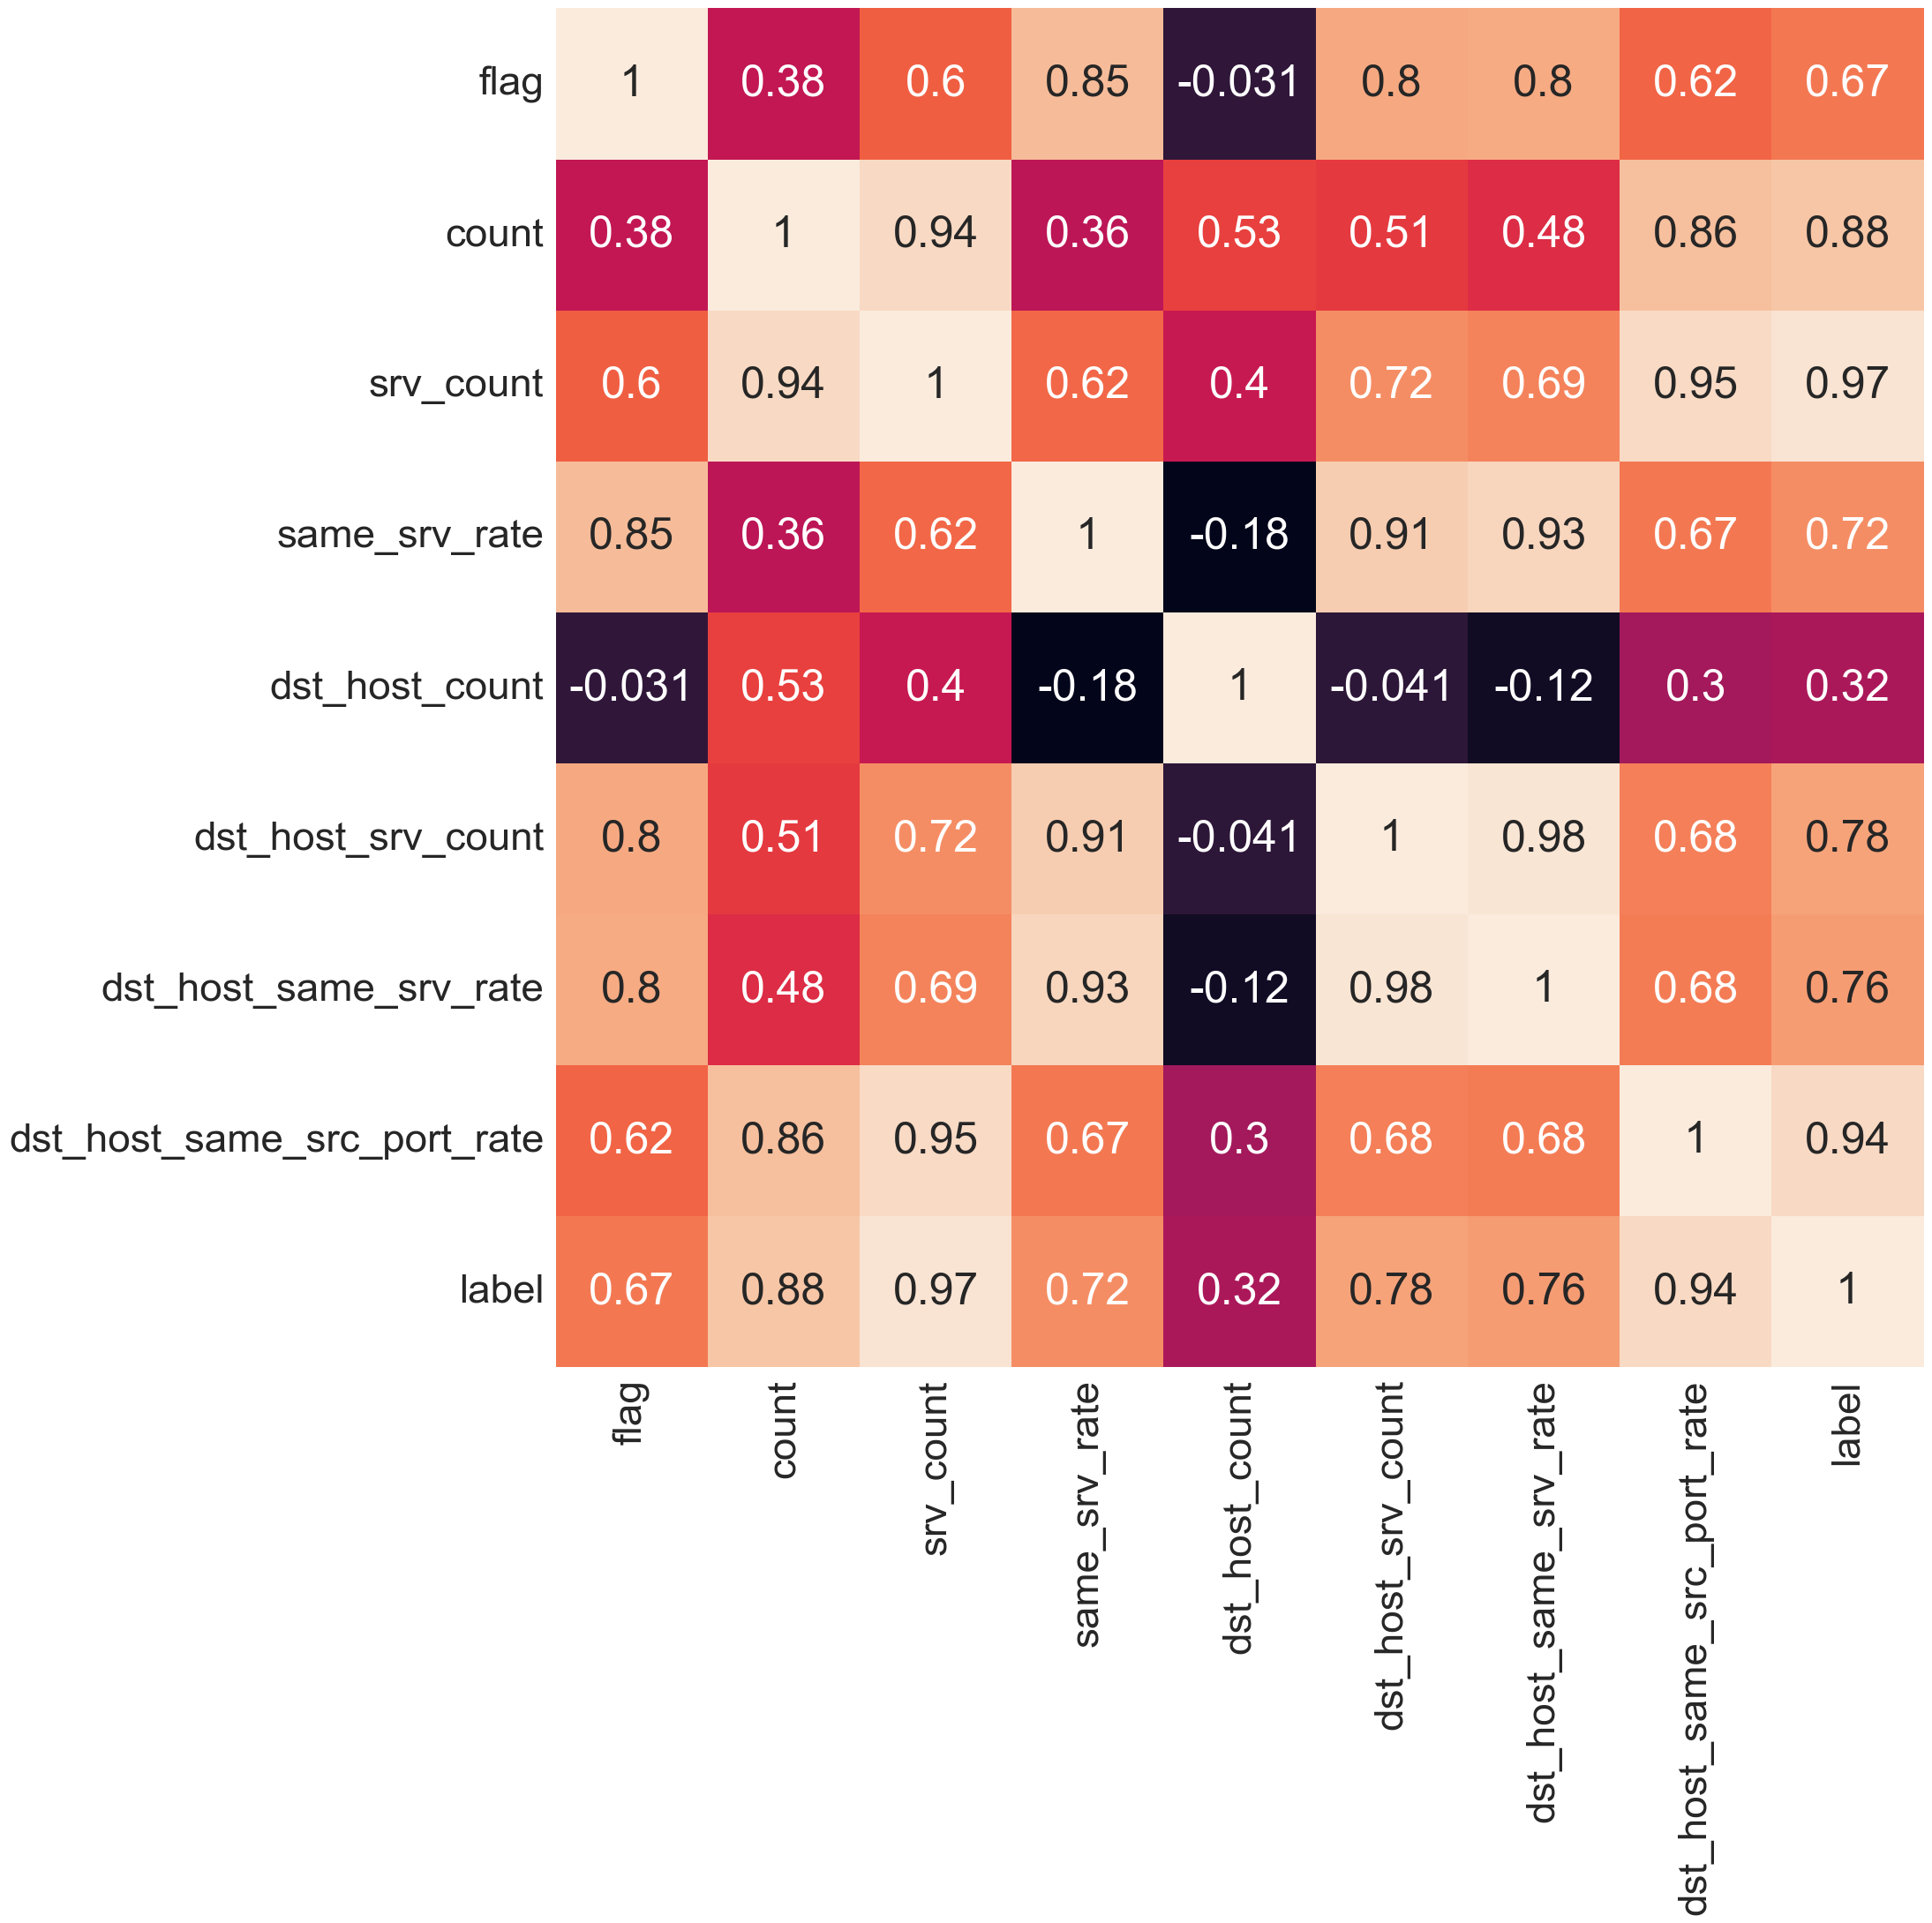

In [7]:
# Feature Selection
df_corr=df.corr()
matrix=df_corr.to_numpy()
target_row = matrix[-1, :]
indices_above_threshold = np.where(target_row >= 0.3)[0]
column_names = df.columns.tolist()
list0 = df.columns[indices_above_threshold].tolist()
df_total=df[list0]
df_corr=df_total.corr()
plt.figure(figsize=(20,20))
sns.set(font_scale=3)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()
sns.set(font_scale=1)

In [10]:
print(list0)

['flag', 'count', 'srv_count', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'label']


In [11]:
new_df = df[list0]

In [14]:
new_df.shape

(4898431, 9)

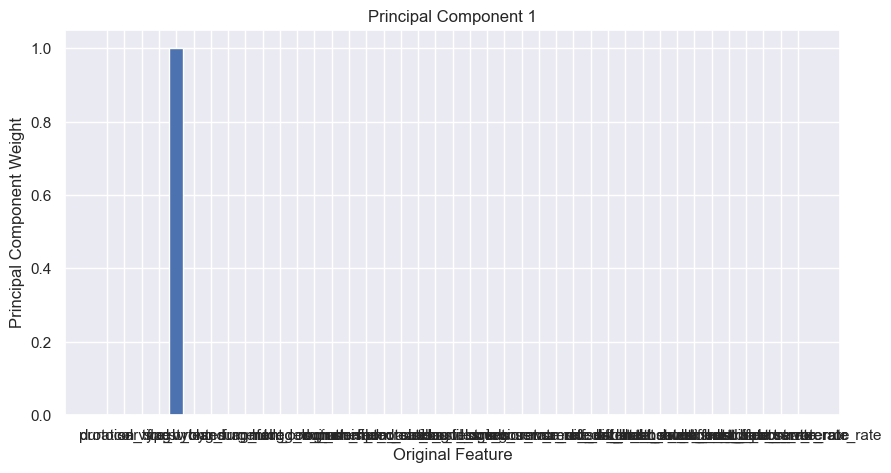

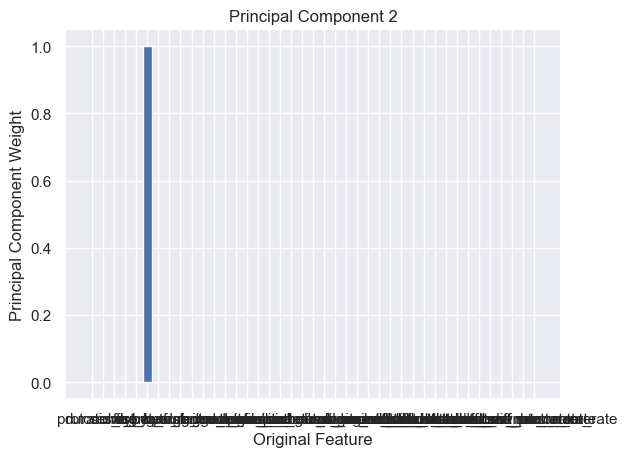

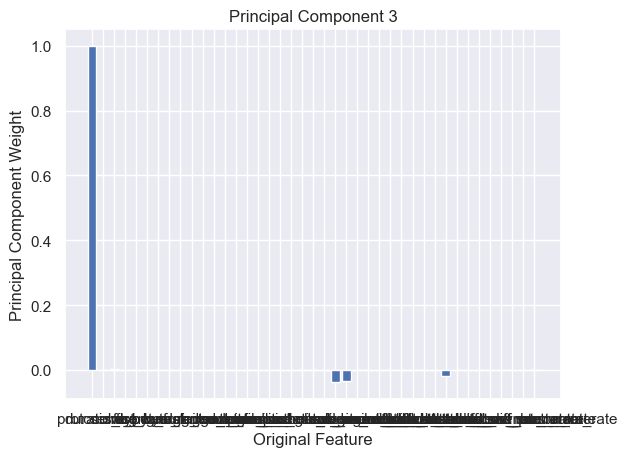

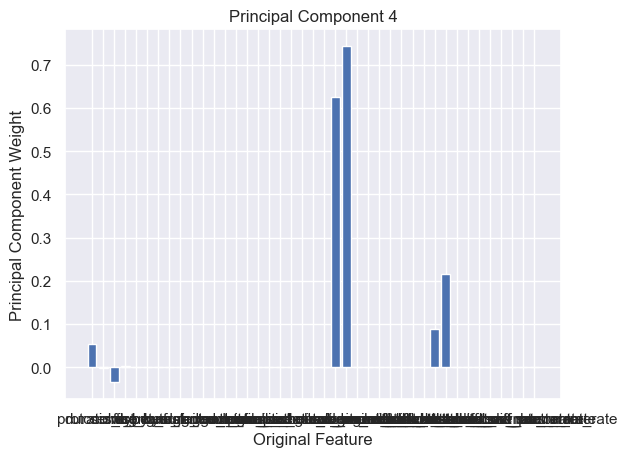

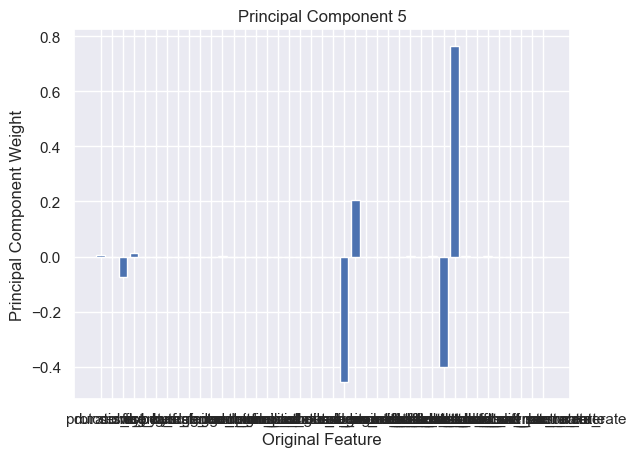

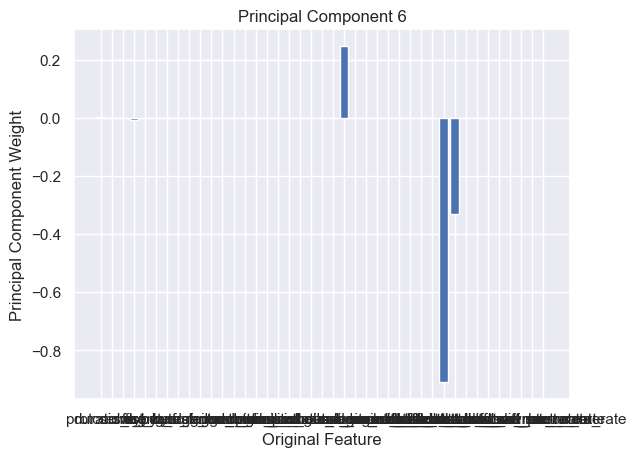

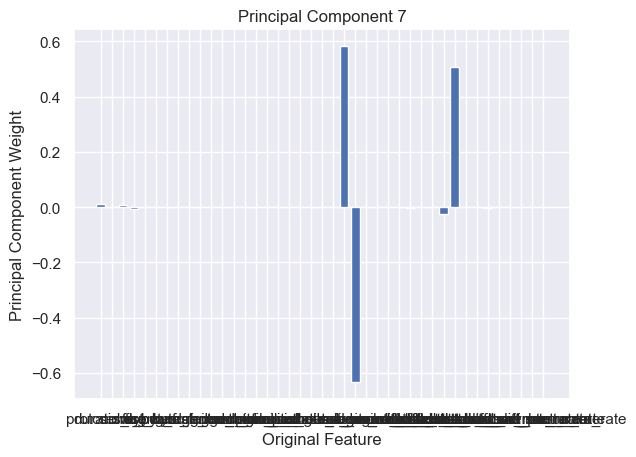

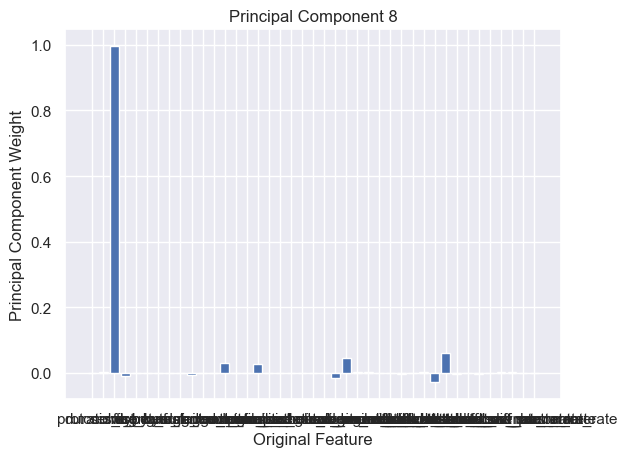

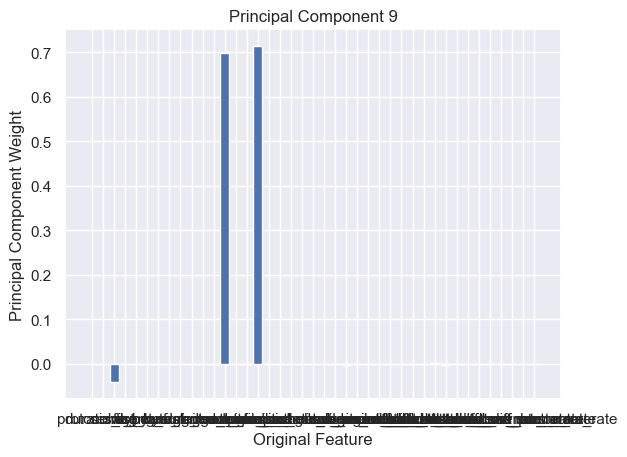

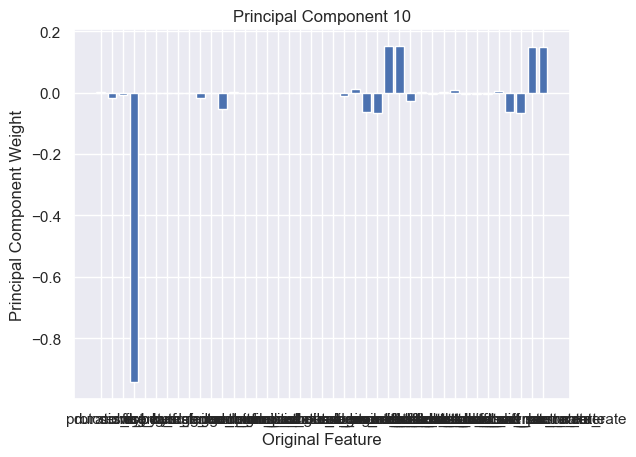

           PC1           PC2        PC3         PC4        PC5         PC6  \
0 -1606.029504  43982.872349 -22.491724 -491.192163  40.644174  193.045161   
1 -1671.560920   3434.893435 -21.654957 -489.514998  40.771324  192.049593   
2 -1598.580810    134.870724 -21.528262 -490.577902  41.383940  190.562970   
3 -1601.332330    938.871611 -21.639342 -488.906478  41.495389  189.565119   
4 -1595.810133   -607.130171 -21.696927 -487.234754  41.607576  188.567444   

         PC7        PC8       PC9      PC10  label  
0 -98.424915 -14.401369  0.386194 -2.791865      0  
1 -97.992320 -14.343727  0.384797 -2.791777      0  
2 -97.457294 -14.338073  0.386052 -2.778460      0  
3 -97.027003 -14.274733  0.384467 -2.767076      0  
4 -96.596734 -14.211681  0.382882 -2.756214      0  


In [13]:
# 타겟 열 분리
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
features = df.drop(columns=['label'])
target = df['label']

# PCA 적용
n_components = 10  # 원하는 주성분의 개수 설정
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(features)

# 주성분 계수 확인
pca_components = pca.components_

# 원래 피처의 기여도 시각화
plt.figure(figsize=(10, 5))
component_number = 1
for component in pca_components:
    plt.bar(range(len(component)), component, tick_label=features.columns)
    plt.title(f'Principal Component {component_number}')
    plt.xlabel('Original Feature')
    plt.ylabel('Principal Component Weight')
    plt.show()
    component_number += 1

# 주성분을 데이터프레임으로 변환
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
principal_df['label'] = target

# 확인
print(principal_df.head())